Mounted at /content/drive
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11860
           1       0.97      0.86      0.91      3797
           2       0.91      0.99      0.95      4343

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.94      0.94     20000



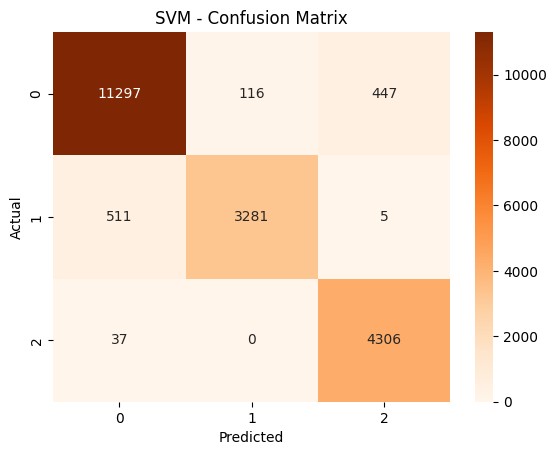

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/MLAssignment/star_classification.csv"
df = pd.read_csv(file_path)

df.drop(columns=['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID'], inplace=True)
df['class'] = LabelEncoder().fit_transform(df['class'])

X = df.drop(columns=['class'])
y = df['class']
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf')  # or try linear, poly
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
